### Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

### Project Breakdown
- Exploratory Data Analysis and Preprocessing
- Word2Vec with Gensim
- Exploring Results
- Building and Visualizing Interactive Network Graph

### Exploratory Data Analysis and Preprocessing

In [2]:
from gensim.parsing.preprocessing import remove_stopwords
from tqdm import tqdm
import pandas as pd
import pickle
import string
import json

In [3]:
recipe_sources = ['ar', 'epi', 'fn']

In [88]:
df = pd.DataFrame()
sources, titles, ingredients, instructions = [], [], [], []
for recipe_source in recipe_sources:
    data = json.load(open(f'Data/recipes_raw_nosource_{recipe_source}.json', 'r'))
    for _, recipe in data.items():
        if ('title' in recipe) and ('ingredients' in recipe) and ('instructions' in recipe):
            sources.append(recipe_source)
            titles.append(recipe['title'])
            ingredients.append([str(ingredient).replace('ADVERTISEMENT', '') for ingredient in recipe['ingredients']])
            instructions.append(str(recipe['instructions']).replace('ADVERTISEMENT', ' '))

df['sources'] = sources
df['title'] = titles                           
df['ingredients'] = ingredients
df['instructions'] = instructions                                                                         

In [89]:
df.head()

,sources,title,ingredients,instructions
0,ar,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves , ...","Place the chicken, butter, soup, and onion in ..."
1,ar,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,ar,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar , 1/2 cup ketchup ...",Preheat oven to 350 degrees F (175 degrees C)....
3,ar,Best Chocolate Chip Cookies,"[1 cup butter, softened , 1 cup white sugar , ...",Preheat oven to 350 degrees F (175 degrees C)....
4,ar,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta , 3 cups fr...",Preheat oven to 350 degrees F. Line a 2-quart ...


In [90]:
df.instructions.values.tolist()[1]
# df.loc[:, 'instructions'][1]

'In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n'

In [122]:
# custom stopwords
to_remove = [
    'tablespoon',
    'tablespoons',
    'teaspoon',
    'teaspoons',
    'tsp',
    'tsps',
    'tbsp',
    'tbsps',
    'pound',
    'pounds',
    'grams',
    'mg',
    'ounce'
    'ounces',
    'kg',
    'crushed',
    'chopped',
    'finely',
    'softened',
    'cups',
    'cup'
]

translation_table = str.maketrans('', '', string.punctuation+string.digits)# remove punctuation and digits
# example
print(df.loc[:, 'instructions'][1])
print(df.loc[:, 'instructions'][1].translate(translation_table))

In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.
Cook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.

In a slow cooker mix cream of mushroom soup dry onion soup mix and water Place pot roast in slow cooker and coat with soup mixture
Cook on High setting for  to  hours or on Low setting for  to  hours



In [123]:
def preprocess(items):
    res = []
    for i, item in enumerate(items):
        temp = item.lower().replace('-', ' ') # lowercase
        temp = temp.translate(translation_table) # remove punctuation and digits
        temp = remove_stopwords(temp) # remove stopwords
        for stop_word in to_remove: # remove custom stopwords
            temp = temp.replace(stop_word, '') 
        res.append(temp.split())# split into words
    return res

In [109]:
instructions = df.instructions.values.tolist()
ingredients = [', '.join(x) for x in df.ingredients.values.tolist()]

In [94]:
df.ingredients.values.tolist()[1]

['2 (10.75 ounce) cans condensed cream of mushroom soup ',
 '1 (1 ounce) package dry onion soup mix ',
 '1 1/4 cups water ',
 '5 1/2 pounds pot roast ',
 '']

In [95]:
', '.join(df.ingredients.values.tolist()[1])

'2 (10.75 ounce) cans condensed cream of mushroom soup , 1 (1 ounce) package dry onion soup mix , 1 1/4 cups water , 5 1/2 pounds pot roast , '

In [110]:
train_data = preprocess(instructions+ingredients)

In [115]:
len(train_data) # Number of sentences (instructions + ingredients)

249294

In [112]:
with open('Data/train_data.pkl', 'wb') as f:
    pickle.dump(train_data, f)

### Word2Vec

In [3]:
from gensim.models.word2vec import Word2Vec

In [4]:
with open('Data/train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

NameError: name 'pickle' is not defined

In [ ]:
train_data[0]

['place',
 'chicken',
 'butter',
 'soup',
 'onion',
 'slow',
 'cooker',
 'water',
 'cover',
 'cover',
 'cook',
 'hours',
 'high',
 'minutes',
 'serving',
 'place',
 'torn',
 'biscuit',
 'dough',
 'slow',
 'cooker',
 'cook',
 'dough',
 'longer',
 'raw',
 'center']

In [5]:
model = Word2Vec() 
model.build_vocab(train_data)

NameError: name 'train_data' is not defined

In [6]:
model.wv.key_to_index.__len()

AttributeError: 'dict' object has no attribute '__len'

In [15]:
model.corpus_total_words # Number of words in the vocabulary
model.corpus_count # Number of sentences (instructions + ingredients)
model.estimate_memory() # Estimated memory in bytes
model.cum_table # Cumulative distribution table used for negative sampling
model.epochs # Number of epochs
model.predict_output_word('orange') # Predicts the top-N most likely words for a given word or list of words.

[('rotation', 7.7429344e-05),
 ('seat', 7.7429344e-05),
 ('doubling', 7.7429344e-05),
 ('chocolat', 7.7429344e-05),
 ('ca', 7.7429344e-05),
 ('caravan', 7.7429344e-05),
 ('cantal', 7.7429344e-05),
 ('ii', 7.7429344e-05),
 ('tarator', 7.7429344e-05),
 ('compromised', 7.7429344e-05)]

In [16]:
%%time
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

KeyboardInterrupt: 

In [144]:
model.wv.most_similar(['lobster', 'shrimp'], topn=10)

[('crawfish', 0.8306896686553955),
 ('prawns', 0.8231657147407532),
 ('tails', 0.7359362244606018),
 ('crabs', 0.7040517926216125),
 ('crayfish', 0.7034804821014404),
 ('dungeness', 0.7017438411712646),
 ('shrimps', 0.6972912549972534),
 ('lobsters', 0.6859474182128906),
 ('scallops', 0.675050675868988),
 ('crab', 0.6355345249176025)]

In [166]:
# analogy test
egg = model.wv['egg']
eggs = model.wv['eggs']
pretzel = model.wv['pretzel']
print(model.wv.most_similar(positive=[eggs, pretzel], negative=[egg], topn=1))

[('pretzel', 0.558613657951355)]


In [167]:
model.wv.most_similar(['chicken', 'beef'], topn=10)

[('turkey', 0.7122672200202942),
 ('veal', 0.6797453761100769),
 ('pork', 0.6667901873588562),
 ('meat', 0.6656396985054016),
 ('lamb', 0.6162497401237488),
 ('pheasant', 0.5887327790260315),
 ('rabbit', 0.5818605422973633),
 ('steak', 0.5647022128105164),
 ('venison', 0.5616223216056824),
 ('squab', 0.5553051829338074)]

In [19]:
model.save('Data/w2v.model')

### Exploring Results

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [183]:
model = Word2Vec.load('Data/w2v.model')
model.wv.key_to_index.__len__() # Number of words in the vocabulary

12915

In [22]:
with open('Data/items_for_sale.txt', 'r') as f:
    items_for_sale = f.read().split('\n')

In [23]:
items_for_sale[:10]

['salt',
 'pepper',
 'fresh',
 'oil',
 'sugar',
 'butter',
 'garlic',
 'cheese',
 'water',
 'lemon']

In [24]:
words, vectors = [], []
for item in items_for_sale:
    try:
        vectors.append(model.wv.get_vector(item))
        words.append(item)
    except KeyError:
        print(f'Word {item} not found in vocab!')        

Word jalapeÃ±o not found in vocab!
Word crÃ¨me not found in vocab!
Word gruyÃ¨re not found in vocab!
Word tabascoÂ® not found in vocab!
Word jalapeÃ±os not found in vocab!
Word krispiesÂ® not found in vocab!
Word knorrÂ® not found in vocab!
Word kelloggsÂ® not found in vocab!
Word splendaÂ® not found in vocab!
Word nestleÂ® not found in vocab!
Word truviaÂ® not found in vocab!
Word pimentÃ³n not found in vocab!
Word hersheysÂ® not found in vocab!
Word kahluaÂ® not found in vocab!
Word kahlÃºa not found in vocab!
Word spamÂ® not found in vocab!
Word oreoÂ® not found in vocab!
Word bisquickÂ® not found in vocab!
Word heinzÂ® not found in vocab!
Word nutellaÂ® not found in vocab!
Word nestlÃ©Â® not found in vocab!
Word orÃ©gano not found in vocab!
Word monteÂ® not found in vocab!
Word hellmannsÂ® not found in vocab!
Word frescoÂ® not found in vocab!
Word soufflÃ© not found in vocab!
Word liptonÂ® not found in vocab!
Word butterfingerÂ® not found in vocab!
Word rosÃ© not found in vocab!
Wo

In [25]:
sims = cosine_similarity(vectors, vectors)
sims.shape

(865, 865)

In [26]:
for i in range(len(vectors)):
    for j in range(len(vectors)):
        if i <= j:
            sims[i, j] = False

In [27]:
k = 20
indices = list(range(len(vectors)))
random.shuffle(indices)

In [29]:
indices = indices[:k]

In [30]:
# 20 vectors to draw a heatmap
small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]
small_sims = cosine_similarity(small_vectors, small_vectors)

In [31]:
for x in range(len(small_vectors)):
    small_sims[x, x] = 0
small_sims[19,13]

0.051877018

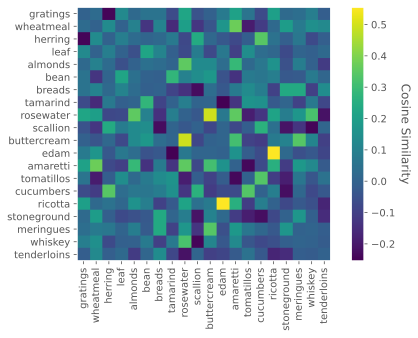

In [184]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
# Colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Cosine Similarity', rotation=-90, va="bottom")

plt.show()

In [33]:
np.savetxt("Data/words.txt", words, fmt="%s")
np.save("Data/vectors.npy", vectors)

### Building and Visualizing Interactive Network Graph
Let's see if we can visualize our results better!

In [34]:
import plotly.graph_objects as go
from plotly.offline import plot
import networkx as nx

In [35]:
words = np.loadtxt("Data/words.txt", dtype=str)
vectors = np.load("Data/vectors.npy")

In [36]:
sims = cosine_similarity(vectors, vectors) 

In [37]:
# to exclude apple -> pear, pear -> apple
for i in range(len(vectors)):
    for j in range(len(vectors)):
        if i<=j:
            sims[i, j] = False

In [38]:
indices = np.argwhere(sims > 0.65)
len(indices)

1088

In [39]:
# build a Graph
G = nx.Graph()

for index in indices:
    G.add_edge(words[index[0]], words[index[1]], weight=sims[index[0], index[1]])

In [40]:
weight_values = nx.get_edge_attributes(G, 'weight')
weight_values[('egg', 'eggs')]

0.7625675

In [41]:
positions = nx.spring_layout(G)
nx.set_node_attributes(G, name='position', values=positions )

In [42]:
searches = ['gouda', 'udon', 'parsley']

In [43]:
edge_x = []
edge_y = []
weights = []
ave_x, ave_y = [], []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['position']
    x1, y1 = G.nodes[edge[1]]['position']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    ave_x.append(np.mean([x0, x1]))
    ave_y.append(np.mean([y0, y1]))
    weights.append(f'{edge[0]}, {edge[1]}: {weight_values[(edge[0], edge[1])]}')

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    opacity=0.7,
    line=dict(width=2, color='White'),
    hoverinfo='text',
    mode='lines')

edge_trace.text = weights


node_x = []
node_y = []
sizes = []
for node in G.nodes():
    x, y = G.nodes[node]['position']
    node_x.append(x)
    node_y.append(y)
    if node in searches:
        sizes.append(50)
    else:
        sizes.append(15)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        line=dict(color='White'),
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Picnic',
        reversescale=False,
        color=[],
        opacity=0.9,
        size=sizes,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2
    )
)

invisible_similarity_trace = go.Scatter(
    x=ave_x, y=ave_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=[],
        opacity=0,
    )
)

invisible_similarity_trace.text=weights

In [44]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(adjacencies[0])

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [45]:
fig = go.Figure(
    data=[edge_trace, node_trace, invisible_similarity_trace],
    layout=go.Layout(
        title='Network Graph of Word Embeddings',
        template='plotly_dark',
        titlefont_size=20,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        annotations=[
            dict(
                text="Adapted from: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.005, y=-0.002 ) 
        ],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

plot(fig)

'temp-plot.html'